In [1]:
# Time Series

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hupili/python-for-data-and-media-communication/master/text-analysis/regular_reader_tweets.csv')

In [4]:
df.head()

,user_key,created_str,text
0,ryanmaxwell_1,3/22/2016 18:31,#IslamKills Are you trying to say that there w...
1,detroitdailynew,10/10/2016 20:57,"Clinton: Trump should’ve apologized more, atta..."
2,cookncooks,2/22/2017 12:43,RT @ltapoll: Who was/is the best president of ...
3,queenofthewo,12/26/2016 15:06,RT @jww372: I don't have to guess your religio...
4,mrclydepratt,8/6/2017 2:36,RT @Shareblue: Pence and his lawyers decided w...


In [5]:
from datetime import datetime
from dateutil import parser
import numpy


In [6]:
len(df)

203482

In [7]:
df = df.sample(frac=0.1)

In [8]:
len(df)

20348

In [9]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['created_str'].apply(parse_datetime)

In [10]:
df.set_index('datetime').resample('1w').aggregate('count').plot()

In [11]:
def has_hillary(t):
    return 'hillary' in str(t).lower()
df['kw-hillary'] = df['text'].apply(has_hillary)

In [12]:
def has_trump(t):
    return 'trump' in str(t).lower()
df['kw-trump'] = df['text'].apply(has_trump)

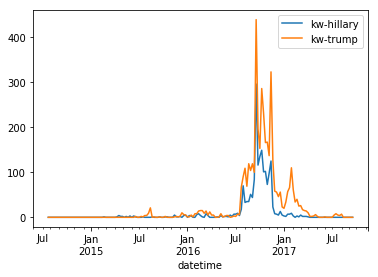

In [13]:
df.set_index('datetime').resample('1w').aggregate('sum').plot()

In [14]:
df.set_index('datetime').resample('1w').aggregate('sum').tail()

,kw-hillary,kw-trump
datetime,,
2017-08-20,0.0,0.0
2017-08-27,0.0,0.0
2017-09-03,0.0,0.0
2017-09-10,0.0,0.0
2017-09-17,0.0,0.0


In [15]:
df['kw-all'] = df['text'].apply(lambda x: 1)

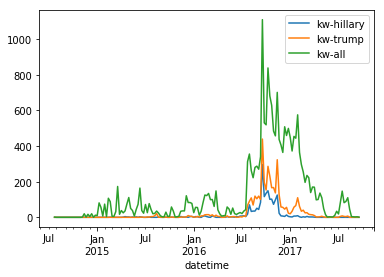

In [16]:
df.set_index('datetime').resample('1w').aggregate('sum').plot()

In [17]:
df_kws = df.set_index('datetime').resample('1w').aggregate('sum')

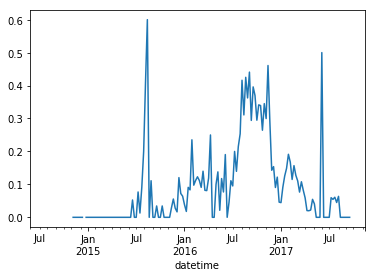

In [18]:
(df_kws['kw-trump'] / df_kws['kw-all']).plot()

In [19]:
s_trump_ratio = (df_kws['kw-trump'] / df_kws['kw-all'])

In [20]:
s_hillary_ratio = (df_kws['kw-hillary'] / df_kws['kw-all'])

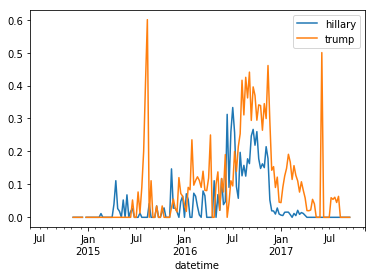

In [21]:
pd.DataFrame({'trump':s_trump_ratio, 'hillary': s_hillary_ratio}).plot()

## Case reproduction

Let's try to reproduce some functions here: https://www.nbcnews.com/tech/social-media/russian-trolls-went-attack-during-key-election-moments-n827176

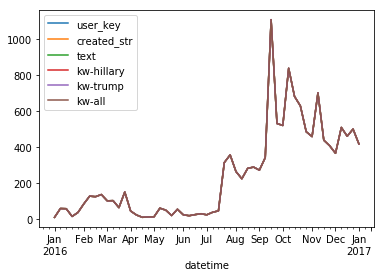

In [22]:
df[
    (df['datetime'] > datetime(2016, 1, 1)) &
    (df['datetime'] < datetime(2017, 1, 1))
].set_index('datetime').resample('1w').aggregate('count').plot()

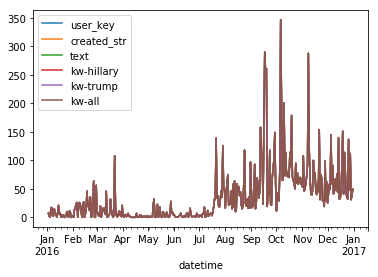

In [23]:
# This one is more close

df[
    (df['datetime'] > datetime(2016, 1, 1)) &
    (df['datetime'] < datetime(2017, 1, 1))
].set_index('datetime').resample('1d').aggregate('count').plot()

In [24]:
df['kw-cliton'] = df['text'].apply(lambda t: 'cliton' in str(t).lower())
df['kw-debate'] = df['text'].apply(lambda t: 'debate' in str(t).lower())
df['kw-blacklivesmatter'] = df['text'].apply(lambda t: 'blacklivesmatter' in str(t).lower())

In [25]:
df_kws = df.set_index('datetime').resample('1m').aggregate('sum')

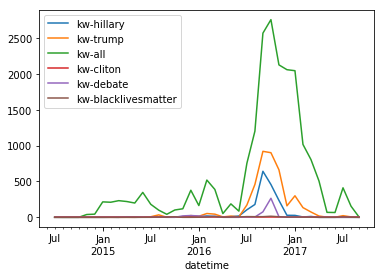

In [26]:
df_kws.plot()

In [27]:
del df_kws['kw-all']

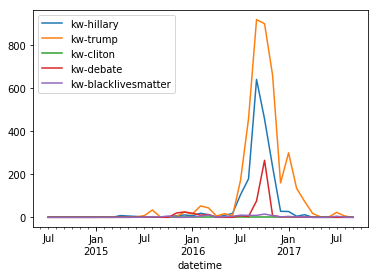

In [28]:
df_kws.plot()

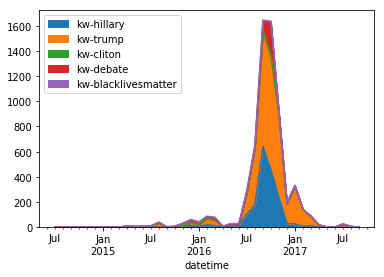

In [29]:
df_kws.plot(kind='area')

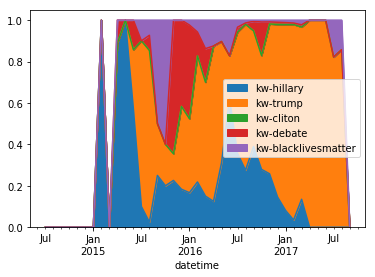

In [30]:
df_kws.divide(df_kws.sum(axis=1), axis=0).plot(kind='area')